# CapsNets on Fashion Mnist dataset

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

tf.__version__
%matplotlib inline

## Loading dataset and normalising

In [2]:
(X_train, y_train), (X_test , y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train = X_train / 255.0
X_train = tf.cast(X_train, dtype=tf.float32)
X_train = tf.expand_dims(X_train, axis=-1)

X_test = X_test / 255.0
X_test = tf.cast(X_test, dtype=tf.float32)
X_test = tf.expand_dims(X_test, axis=-1)

# Reducing the size of the samples for faster training
X_train = X_train[:1024]
y_train = y_train[:1024]

X_test = X_test[:512]
y_test = y_test[:512]

X_train.shape, y_train.shape

(TensorShape([1024, 28, 28, 1]), (1024,))

1024 images of size 28x28 over one channel

## Sample visualisation

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

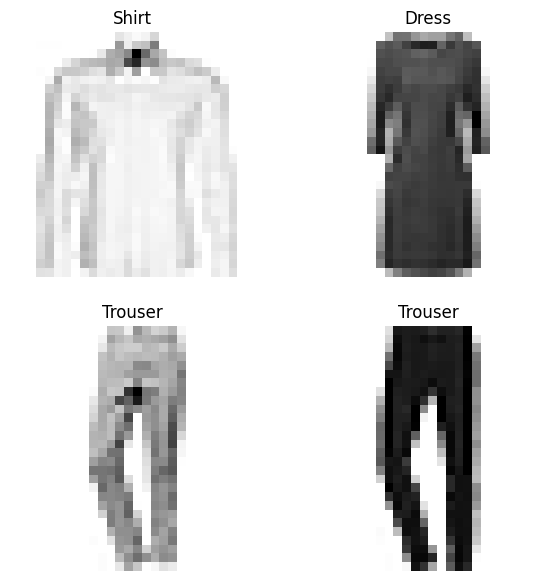

In [4]:
import random

plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(X_train)))
  plt.imshow(X_train[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[y_train[rand_index]])
  plt.axis(False)

## Build CapsNet model

In [5]:
# Setting PATH to import CapsNet class from python file to notebook

import os
import sys
directory_path = os.path.abspath(os.path.join('../src'))
if directory_path not in sys.path:
    sys.path.append(directory_path)

from CapsNet import CapsNet

In [6]:
params = {
    "epochs": 10,
    "epsilon": 1e-7,
    "m_minus": 0.1,
    "m_plus": 0.9,
    "lambda_": 0.5,
    "alpha": 0.0005,
    "no_of_conv_kernels": 128,
    "no_of_primary_capsules": 32,
    "no_of_secondary_capsules": 10,
    "primary_capsule_vector": 8,
    "secondary_capsule_vector": 16,
    "r":3,
    "train_metrics": ['accuracy', 'precision', 'recall', 'f1']
}

model = CapsNet(**params)
model.compile()
model.summary()

Model: "caps_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvolutionLayer (Conv2D)   multiple                  0 (unused)
                                                                 
 PrimaryCapsule (Conv2D)     multiple                  0 (unused)
                                                                 
 dense (Dense)               multiple                  0 (unused)
                                                                 
 dense_1 (Dense)             multiple                  0 (unused)
                                                                 
 dense_2 (Dense)             multiple                  0 (unused)
                                                                 
Total params: 1,474,560
Trainable params: 1,474,560
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.fit(X_train, y_train, tf.keras.optimizers.Adam())

Epoch 1/10: 100%|██████████| 16/16 [00:10<00:00,  2.70it/s, Evaluating]/Users/mat/anaconda3/envs/capsnet/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Epoch 10/10: 100%|██████████| 16/16 [00:06<00:00,  2.53it/s, Loss : 0.0013]


{'accuracy': ListWrapper([0.6728515625, 0.783203125, 0.791015625, 0.8291015625, 0.8525390625, 0.8740234375, 0.884765625, 0.8994140625, 0.92578125, 0.9306640625]),
 'precision': ListWrapper([0.6405656851157249, 0.7857693987730529, 0.8022188709591443, 0.8321647508099613, 0.8530569219693175, 0.8783940499882922, 0.8902988690267022, 0.9060662037006296, 0.9283745811200247, 0.9338124096353302]),
 'recall': ListWrapper([0.6728515625, 0.783203125, 0.791015625, 0.8291015625, 0.8525390625, 0.8740234375, 0.884765625, 0.8994140625, 0.92578125, 0.9306640625]),
 'f1': ListWrapper([0.63532962837562, 0.7796937945936728, 0.7863945109536282, 0.8240971302657434, 0.8495043984662674, 0.8707504671199046, 0.8812980061550633, 0.8965413455586343, 0.9247804522756987, 0.9298148189513261]),
 'loss': ListWrapper([0.008731848, 0.003897006, 0.002858365, 0.0024340113, 0.0021810269, 0.0019359874, 0.0017725205, 0.0016051423, 0.0014299164, 0.0013360748])}

In [8]:
preds = model.predict(X_test)

## Loading and saving

INFO:tensorflow:Assets written to: ../saved_models/caps_net/assets


INFO:tensorflow:Assets written to: ../saved_models/caps_net/assets


             T-shirt/top  Trouser  Pullover  Dress  Coat  Sandal  Shirt  \
T-shirt/top           49        0         2      1     0       0      3   
Trouser                0       52         0      1     0       0      0   
Pullover               0        0        45      1    16       0      8   
Dress                  0        1         0     41     1       0      3   
Coat                   0        2         8      1    41       0      6   
Sandal                 0        0         0      0     0      36      0   
Shirt                  6        0         9      3     7       0     21   
Sneaker                0        0         0      0     0       1      0   
Bag                    0        0         0      0     0       1      2   
Ankle boot             0        0         0      0     0       1      0   

             Sneaker  Bag  Ankle boot  
T-shirt/top        0    1           0  
Trouser            0    0           0  
Pullover           0    1           0  
Dress         

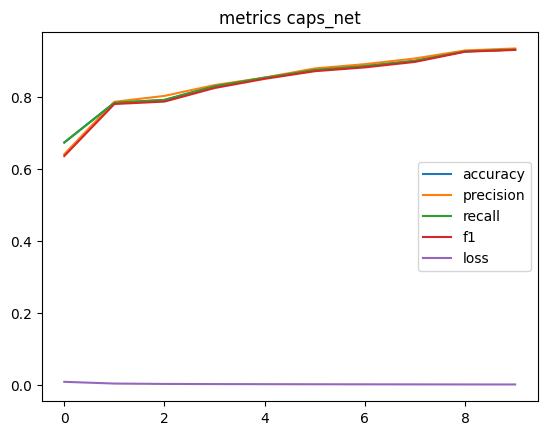

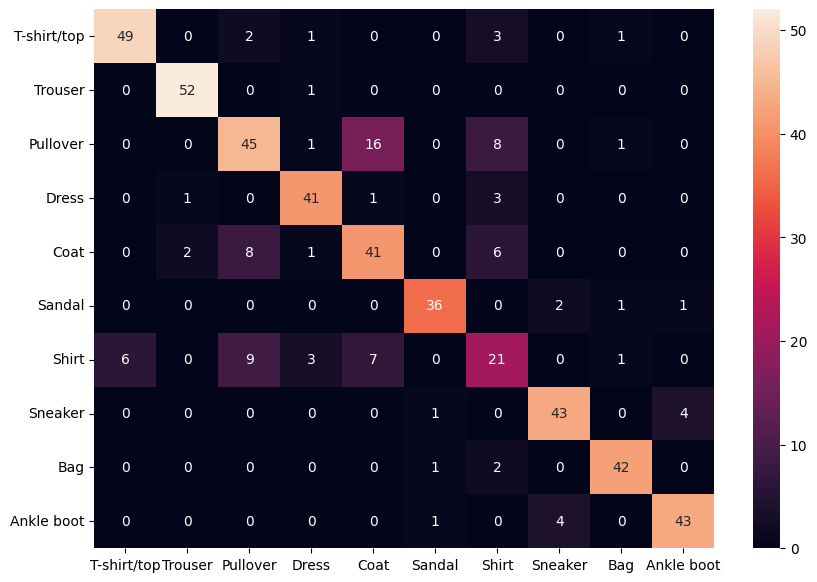

In [9]:
model.save(evaluate=(X_test, y_test), classes=class_names)

In [11]:
loaded_model = tf.keras.models.load_model('../saved_models/caps_net', custom_objects={'CapsNet': CapsNet})
loaded_model.compile()
loaded_model.summary()

Model: "caps_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvolutionLayer (Conv2D)   multiple                  10496     
                                                                 
 PrimaryCapsule (Conv2D)     multiple                  2654464   
                                                                 
 dense_3 (Dense)             multiple                  82432     
                                                                 
 dense_4 (Dense)             multiple                  525312    
                                                                 
 dense_5 (Dense)             multiple                  803600    
                                                                 
Total params: 5,550,864
Trainable params: 5,550,864
Non-trainable params: 0
_________________________________________________________________


             T-shirt/top  Trouser  Pullover  Dress  Coat  Sandal  Shirt  \
T-shirt/top           49        0         2      1     0       0      3   
Trouser                0       52         0      1     0       0      0   
Pullover               0        0        45      1    16       0      8   
Dress                  0        1         0     41     1       0      3   
Coat                   0        2         8      1    41       0      6   
Sandal                 0        0         0      0     0      36      0   
Shirt                  6        0         9      3     7       0     21   
Sneaker                0        0         0      0     0       1      0   
Bag                    0        0         0      0     0       1      2   
Ankle boot             0        0         0      0     0       1      0   

             Sneaker  Bag  Ankle boot  
T-shirt/top        0    1           0  
Trouser            0    0           0  
Pullover           0    1           0  
Dress         

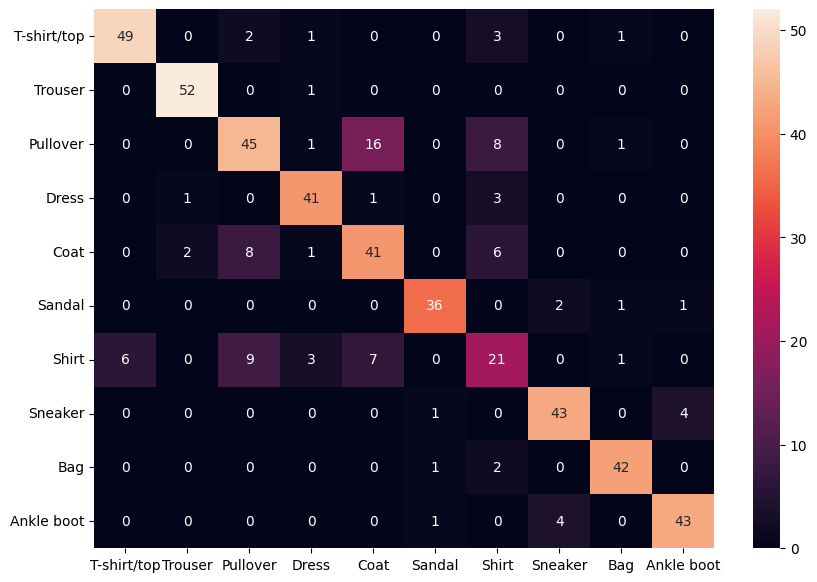

In [12]:
loaded_model.evaluate(X_test, y_test, class_names)